# Types of Variables in Python 

1. Local Variable
2. Instance Variable
3. Class Variable

### Local Variable

- A local variable is a variable that is defined inside a function and can be accessed only within that function.

In [18]:
def calculate_mean(data):
    total = sum(data)      # local variable
    count = len(data)      # local variable
    return total / count

data = [23,45,65,74,98]
result = calculate_mean(data)
result

61.0

### Instance Variable

- If the value of a variable changes from object to object, such variables are called instance variables.
- Each object gets its own separate copy of instance variables.
- Changes made to an instance variable of one object do not affect other objects.

#### Instance variables are usually created:
- Inside the constructor `__init__`
- Using object reference outside the class
- Inside instance methods using self

In [44]:
class Student:
    def __init__(self, name, marks):
        self.name = name      # instance variable
        self.marks = marks    # instance variable

    def show_info(self):
        self.course = "B.Tech"
        print("Name:", self.name)
        print("Course:",self.course)
        print("Marks:",self.marks)

s1 = Student("Ajay", 85)
s2 = Student("Anushaka", 92)

print(s1.name, s1.marks)
print(s2.name, s2.marks)

Ajay 85
Anushaka 92


**Explanation:**
- s1 and s2 are different objects
- Both have their own copies of name and marks
- Changing s1.marks will not affect s2.marks

In [47]:
s1.marks = 98
print(s1.marks)
print(s2.marks)

98
92


In [51]:
s1.show_info()
s2.show_info()

Name: Ajay
Course: B.Tech
Marks: 98
Name: Anushaka
Course: B.Tech
Marks: 92


In [49]:
s1.rollno = 101
s2.rollno = 102
print(s1.rollno, s2.rollno)

101 102


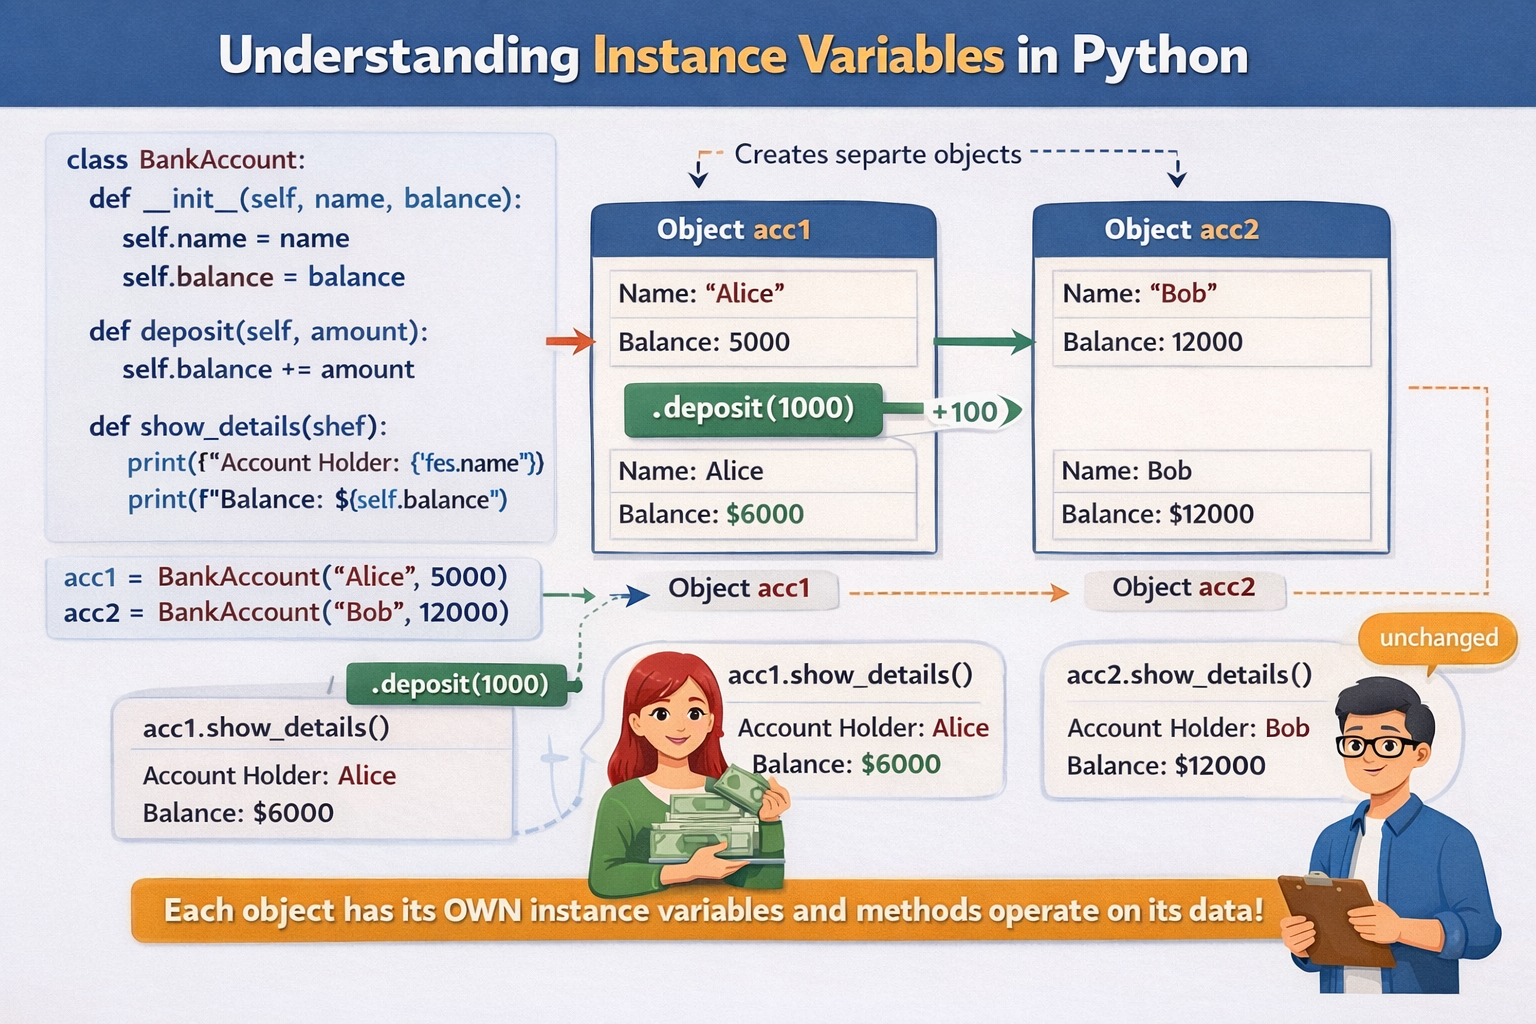

In [74]:
class BankAccount:
    def __init__(self, name, balance):
        self.name = name
        self.balance = balance
    
    def deposit(self,amount):
        self.balance += amount
    
    def show_details(self):
        print(f"{"Account Holder:", self.name}")
        print(f"{"Balance:", self.balance}")

In [76]:
acc1 = BankAccount("Alice", 5000)
acc2 = BankAccount("Bob", 12000)

In [78]:
acc1.show_details()
acc2.show_details()

('Account Holder:', 'Alice')
('Balance:', 5000)
('Account Holder:', 'Bob')
('Balance:', 12000)


In [80]:
acc1.deposit(1000)

In [72]:
acc1.show_details()
acc2.show_details()

('Account Holder:', 'Alice')
('Balance:', 6000)
('Account Holder:', 'Bob')
('Balance:', 12000)


### Class Variable
- If a variable is shared by all objects of a class, then it is called a class variable.
- Declared inside the class
- Declared outside any method
- Only ONE copy exists
- Shared by all instances (objects)

**Example 1: BankAccount**

- Bank name is same for all accounts
- Balance is different for each account

In [131]:
class BankAccount:
    bank_name = "State Bank of India" # class variable

    def __init__(self, name, balance):
        self.name = name
        self.balance = balance

    def show_detail(self):
        print("Name:", self.name)
        print("Balance:", self.balance)
        print("Bank Name:", self.__class__.bank_name) #Inside an instance method, class variables should be accessed using
                                                      #ClassName.variable or self.__class__.variable.


acc1 = BankAccount("Ajay", 1000000)
acc2 = BankAccount("Anushaka", 150000)

acc1.show_detail()
acc2.show_detail()

Name: Ajay
Balance: 1000000
Bank Name: State Bank of India
Name: Anushaka
Balance: 150000
Bank Name: State Bank of India


✔ count increases for every object <br>
✔ Shared across all objects

**BIGGEST TRAP (VERY IMPORTANT)**

**Modifying class variable using object ❌** <br>
❗ This does NOT change class variable <br>
❗ It creates a new instance variable for acc1

In [136]:
acc1.bank_name = "HDFC"

In [126]:
print(acc1.bank_name)        # HDFC
print(acc2.bank_name)        # SBI
print(BankAccount.bank_name) # SBI

HDFC
State Bank of India
State Bank of India


**Correct way to modify class variable ✅** <br>
✔ Changes for all objects

In [141]:
BankAccount.bank_name = "HDFC"

In [145]:
print(acc1.bank_name)        # HDFC
print(acc2.bank_name)        # HDFC
print(BankAccount.bank_name) # HDFC

HDFC
HDFC
HDFC


**Example 2: Student Count** 

In [148]:
class Student:
    school_name = "Delhi Public School" # class variable
    count = 0                           # class variable

    def __init__(self,name):
        self.name = name
        Student.count += 1
        
s1 = Student("Ajay")
s2 = Student("Anushaka")

print(Student.count)

2


### Comparison Table (Instance vs Class Variable)

| Feature       | Instance Variable    | Class Variable     |
| ------------- | -------------------- | ------------------ |
| Belongs to    | Object               | Class              |
| Copy          | Separate per object  | Single shared      |
| Created using | `self.var`           | `ClassName.var`    |
| Memory        | Multiple copies      | One copy           |
| Best use      | Object-specific data | Common/shared data |


## Deleting Instance Variables and Class Variables in Python

### Deleting Instance Variables
1. **Deleting an instance variable inside the class**
   - To delete an instance variable inside the class, use
   - ```python
     del self.variable

In [248]:
class BankAccount:
    bank_name = "State Bank of India"
    bank_address = "New Delhi"

    def __init__(self, name, balance,address):
        self.name = name
        self.balance = balance
        self.address = address

    def show_detils(self):
        del self.address
        print("Account Holder:", self.name)
        print("Balance:", self.balance)
        

    def delete_account(self):
        del self.name, self.balance

    @classmethod
    def delete_bank_name(cls):
        del cls.bank_name

acc1 = BankAccount("Ajay", 3000000,"NA")
acc2 = BankAccount("Anushaka", 150000,"NA")
acc3 = BankAccount("Saloni", 200000,"NA")
acc4 = BankAccount("Pranithi", 500000,"NA")


acc1.show_detils()
acc2.show_detils()
acc3.show_detils()
acc4.show_detils()

Account Holder: Ajay
Balance: 3000000
Account Holder: Anushaka
Balance: 150000
Account Holder: Saloni
Balance: 200000
Account Holder: Pranithi
Balance: 500000


In [250]:
acc3.delete_account()

### Deleting Class Variables
1. **Deleting a class variable inside the class**
- Class variables should be deleted inside the class using a class method.

In [253]:
print("Bank Name:", BankAccount.bank_name)
print("Bank Address:", BankAccount.bank_address)

Bank Name: State Bank of India
Bank Address: New Delhi


In [255]:
BankAccount.delete_bank_name()

In [257]:
print(BankAccount.bank_name)

AttributeError: type object 'BankAccount' has no attribute 'bank_name'

2. **Deleting a class variable outside the class**

In [260]:
del BankAccount.bank_address

In [262]:
print(BankAccount.bank_address)

AttributeError: type object 'BankAccount' has no attribute 'bank_address'

**Summary Table**
| Variable Type     | Delete Inside Class | Delete Outside Class |
| ----------------- | ------------------- | -------------------- |
| Instance Variable | `del self.var`      | `del obj.var`        |
| Class Variable    | `del cls.var`       | `del ClassName.var`  |
